# Project: Suicide/depression detection using tweets 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/My Drive/DL Project/DL project dataset.csv",encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS

In [ ]:
data.describe(include='all')

,target,ids,date,flag,user,TweetText
count,1.599999e+06,1.599999e+06,1599999,1599999,1599999,1599999
unique,NaN,NaN,774362,1,659775,1581465
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1599999,549,210
mean,2.000001e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935757e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467811e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,4.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

target        int64
ids           int64
date         object
flag         object
user         object
TweetText    object
dtype: object

In [ ]:
import copy
data_ = copy.deepcopy(data)

positif_data = data_[data_.target==4].iloc[:80000,:]
negative_data = data_[data_.target==0].iloc[:80000,:]

sub_data = pd.concat([positif_data,negative_data],axis=0)

# Data exploration

4    800000
0    799999
Name: target, dtype: int64

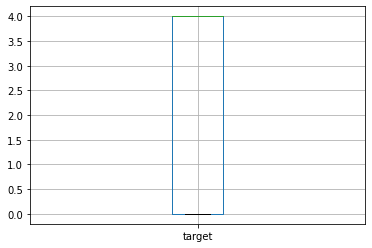

In [ ]:
data.boxplot(column='target')
data_target=data.groupby('target')
data['target'].value_counts()

There is a certain time period where the frequency of people sharing depressed/suicidal tweets.

In [ ]:
data_ = {'target': data['target'], 'date': data['date']}
df = pd.DataFrame(data_)
df.head()

,target,date
0,0,Mon Apr 06 22:19:49 PDT 2009
1,0,Mon Apr 06 22:19:53 PDT 2009
2,0,Mon Apr 06 22:19:57 PDT 2009
3,0,Mon Apr 06 22:19:57 PDT 2009
4,0,Mon Apr 06 22:20:00 PDT 2009


In [ ]:
df['date'] = pd.to_datetime(df['date'])
hour = [ df['date'][i].hour for i in range(len(df['date'])) ]
df['hour'] = hour
df.head()

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,target,date,hour
0,0,2009-04-06 22:19:49,22
1,0,2009-04-06 22:19:53,22
2,0,2009-04-06 22:19:57,22
3,0,2009-04-06 22:19:57,22
4,0,2009-04-06 22:20:00,22


In [ ]:
hour_data = {'0': [0]*24, '2': [0]*24, '4': [0]*24}
for i in range(len(df['hour'])):
    target = str(df['target'][i])
    hour = int(df['hour'][i])
    hour_data[target][hour] += 1

In [ ]:
hour_data = [hour_data['0'], hour_data['2'], hour_data['4']]
# Transpose
hour_data = list(map(list,zip(*hour_data)))

In [ ]:
df1 = pd.DataFrame(hour_data,index = [i for i in range(24)],columns=['negative', 'neutral', 'positive'])

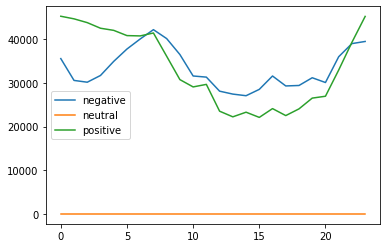

In [ ]:
df1.plot()

In [ ]:
positive_at_count = 0
negative_at_count = 0
TweetTextList = list(sub_data['TweetText'])
targetList = list(sub_data['target'])
for i in range(len(sub_data['TweetText'])):
    if TweetTextList[i].find('@') != -1:
        if targetList[i] == 4:
            positive_at_count += 1
        else:
            negative_at_count += 1
at_counts = [positive_at_count, negative_at_count]

<BarContainer object of 2 artists>

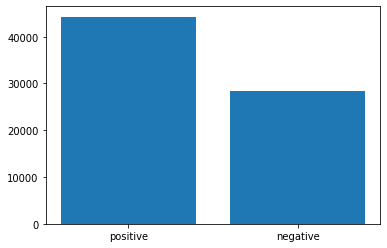

In [ ]:
import matplotlib.pyplot as plt
names = ['positive', 'negative']
values = [positive_at_count, negative_at_count]
plt.bar(names, values)

In [ ]:
import copy
newdata = copy.deepcopy(sub_data)
newdata.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
import string
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

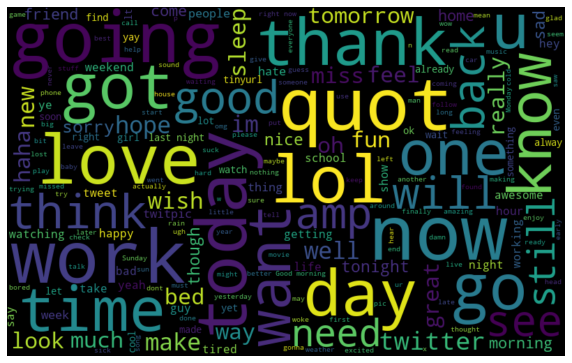

In [ ]:
all_words = ' '.join([text for text in newdata['TweetText']])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Finding the most repeated words.

Finding the most repeated positive words.

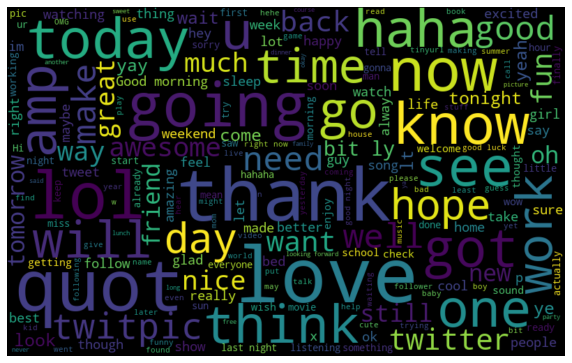

In [ ]:
positive_words = ' '.join([text for text in data['TweetText'][data['target']==4]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

Finding the most repeated negative words.

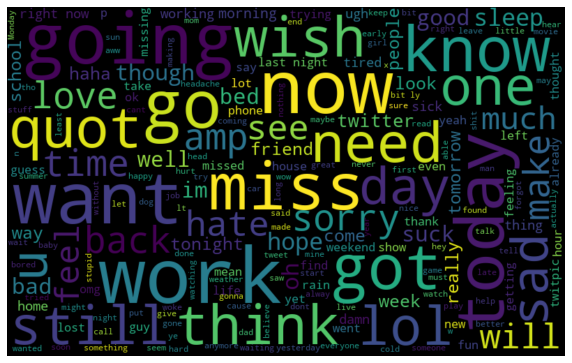

In [ ]:
negative_words = ' '.join([text for text in data['TweetText'][data['target']==0]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

# Data preprocessing

In [ ]:
positif_data = data[data.target==4].iloc[:10000,:]
print(positif_data.shape)
negative_data = data[data.target==0].iloc[:10000,:]
print(negative_data.shape)
data = pd.concat([positif_data,negative_data],axis = 0)
print(data.shape)
data.head()

(10000, 6)
(10000, 6)
(20000, 6)


,target,ids,date,flag,user,TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [ ]:
df = data.copy().sample(8000, random_state=42)
df["label"] = 0
df = df[['TweetText', 'label']]
df.dropna(inplace=True)
df.head()

,TweetText,label
650,56 min till home time and counting! I have a c...,0
802040,"@missygail Shouldn't argue, since you know I'm...",0
808667,@mileycyrus you where amazing on gma. thanks s...,0
801113,"ok so the twilight book is pretty addicting, c...",0
3902,"@Rammi I love Chinatown and its cheap stuffs, ...",0


In [ ]:
col_names = ['id', 'text']
df2 = pd.read_csv(('/content/drive/My Drive/DL Project/depressive_tweets_processed.csv'), sep = '|', header = None, usecols = [0,5], nrows = 3200, names=col_names)

In [ ]:
df2['label'] = 1
df2 = df2[['text', 'label']]
data = pd.concat([df,df2])
data = data.sample(frac=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10345 entries, 4206 to 6993
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetText  8000 non-null   object
 1   label      10345 non-null  int64 
 2   text       2313 non-null   object
dtypes: int64(1), object(2)
memory usage: 323.3+ KB


In [ ]:
# Removing the twitter handles 
data['Clean_TweetText'] = data['TweetText'].str.replace("@", "") 
# Removing links
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "") 
# Removing Punctuations, Numbers, and Special Characters
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
# Remove stop words
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
stop_words=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stop_words])
    return clean_text
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(str(text).lower()))
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,TweetText,label,text,Clean_TweetText
4206,@AbbieLeona_Ox Liverpool. Don't get me jealous...,0,NaN,abbieleona ox liverpool get jealous going lond...
801502,"@ElementsOfJazz Good question, had a bit of a ...",0,NaN,elementsofjazz good question bit rough day phy...
2327,NaN,1,I love Lauren so much <Emoji: Loudly crying fa...,nan
803911,"GUys, heard about any money saving tips that y...",0,NaN,guys heard money saving tips want share feel f...
5342,Is watching a wall come down and protecting a ...,0,NaN,watching wall come protecting bad back rigeurs...


In [ ]:
nltk.download('punkt')
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: nltk.word_tokenize(x))
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Tokenisation

In [ ]:
from keras.preprocessing.text import Tokenizer
MAX_NUM_WORDS = 10000
tokenizer= Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(negative_words)

In [ ]:
word_vector = tokenizer.texts_to_sequences(negative_words)
word_index = tokenizer.word_index

In [ ]:
vocab_size = len(word_index)
vocab_size

121

# Models

TF-IDF model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
corpus = data['Clean_TweetText'].values.astype('U')
tfidf = TfidfVectorizer(max_features = MAX_NUM_WORDS) 
tdidf_tensor = tfidf.fit_transform(corpus)

In [ ]:
tdidf_tensor.shape

(10345, 10000)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tdidf_tensor, data['label'].values, test_size=0.3)

In [ ]:
baseline_model = SVC()
baseline_model.fit(x_train, y_train)

SVC()

In [ ]:
predictions = baseline_model.predict(x_test)
accuracy_score(y_test, predictions)

0.9964561855670103

In [ ]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    1.00000   0.99541   0.99770      2395
           1    0.98472   1.00000   0.99230       709

    accuracy                        0.99646      3104
   macro avg    0.99236   0.99770   0.99500      3104
weighted avg    0.99651   0.99646   0.99647      3104



LSTM model

In [ ]:
from gensim.models import KeyedVectors
EMBEDDING_FILE = '/content/drive/My Drive/DL Project/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))

NameError: ignored

In [ ]:
for (word, idx) in word_index.items():
    if word in word2vec.vocab and idx < MAX_NUM_WORDS:
        embedding_matrix[idx] = word2vec.word_vec(word)

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences

MAX_SEQ_LENGTH = 140
input_tensor = pad_sequences(word_vector, maxlen=MAX_SEQ_LENGTH)

inp = Input(shape=(MAX_SEQ_LENGTH,))
x = Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(100, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(1, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_tensor, df['label'].values, test_size=0.3)

In [ ]:
model.fit(x_train, y_train, batch_size=16, epochs=10)

In [ ]:
preds = model.predict(x_test)

In [ ]:
preds  = np.round(preds.flatten())
print(classification_report(y_test, preds, digits=5))

I have used two different models here, TF-IDF and LSTM as this is a classification problem. Based on the accuracy, TF-IDF seems more appropriate here than LSTM with an accuracy of 0.9.